In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [46]:
books=pd.read_csv('Books.csv')
users=pd.read_csv('Users.csv')
ratings=pd.read_csv('Ratings.csv')

In [47]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [48]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [49]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [50]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [51]:
df=books.merge(ratings,on='ISBN')
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [52]:
#drop ISBN(it not gonna help in recommending), [Image-URL-M, Image-URL-L](as Image-URL-S are same)
df.drop(['ISBN','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [53]:
df

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...
1031131,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [54]:
df=df.merge(users,on='User-ID')
df.head()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,User-ID,Book-Rating,Location,Age
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [55]:
#we can drop year of publish and Image-URL-S as they not gonna help in recommending
df.drop(['Year-Of-Publication','Image-URL-S'],axis=1,inplace=True)

In [56]:
df.head()

,Book-Title,Book-Author,Publisher,User-ID,Book-Rating,Location,Age
0,Classical Mythology,Mark P. O. Morford,Oxford University Press,2,0,"stockton, california, usa",18.0
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN
2,Decision in Normandy,Carlo D'Este,HarperPerennial,8,0,"timmins, ontario, canada",NaN
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,8,0,"timmins, ontario, canada",NaN
4,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",NaN


In [57]:
df['Book-Title'].nunique()

241071

## EDA

## Removing Duplicates

In [58]:
df.shape

(1031136, 7)

In [59]:
#checking for duplicates
df.duplicated().sum()

524

In [60]:
df[df.duplicated()]

,Book-Title,Book-Author,Publisher,User-ID,Book-Rating,Location,Age
361,The Door to December,Dean R. Koontz,Signet Book,11676,0,"n/a, n/a, n/a",NaN
525,Skipping Christmas,JOHN GRISHAM,Doubleday,11676,8,"n/a, n/a, n/a",NaN
1447,My Dream of You,Nuala O'Faolain,Riverhead Books,11676,0,"n/a, n/a, n/a",NaN
1909,The Alibi,Sandra Brown,Warner Books,11676,0,"n/a, n/a, n/a",NaN
2138,The Lion's Game,Nelson DeMille,Warner Books,11676,0,"n/a, n/a, n/a",NaN
...,...,...,...,...,...,...,...
1018579,Storia Del Cinema Italiano,G Brunetta,Editori Riuniti,194653,5,"milano, lombardia, italy",NaN
1018580,Storia Del Cinema Italiano,G Brunetta,Editori Riuniti,194653,5,"milano, lombardia, italy",NaN
1018581,Storia Del Cinema Italiano,G Brunetta,Editori Riuniti,194653,5,"milano, lombardia, italy",NaN
1018792,Widowhood Happens,Gene K. Garrison,Xlibris Corporation,87582,10,"sedona, az, usa",NaN


In [61]:
df=df.drop_duplicates()

In [62]:
df.duplicated().sum()

0

In [63]:
df.shape

(1030612, 7)

## Missing value handling




In [64]:
df.isnull().sum()

Book-Title          0
Book-Author         2
Publisher           2
User-ID             0
Book-Rating         0
Location            0
Age            277709
dtype: int64

In [65]:
#since the null values are so less for Book-Author and Publisher, we can drop them directly
df.dropna(subset=['Book-Author'], inplace=True)
df.dropna(subset=['Publisher'], inplace=True)

In [66]:
df.isnull().sum()

Book-Title          0
Book-Author         0
Publisher           0
User-ID             0
Book-Rating         0
Location            0
Age            277709
dtype: int64

In [67]:
df.shape

(1030608, 7)

In [68]:
#Age column is having large number of null values, we can handle it by using Mode
df['Age'].mode()

0    33.0
Name: Age, dtype: float64

In [69]:
df['Age'].fillna(df['Age'].mode()[0],inplace=True)

In [70]:
df.isnull().sum()

Book-Title     0
Book-Author    0
Publisher      0
User-ID        0
Book-Rating    0
Location       0
Age            0
dtype: int64

In [71]:
df.shape

(1030608, 7)

## Outlier Detection




<Axes: >

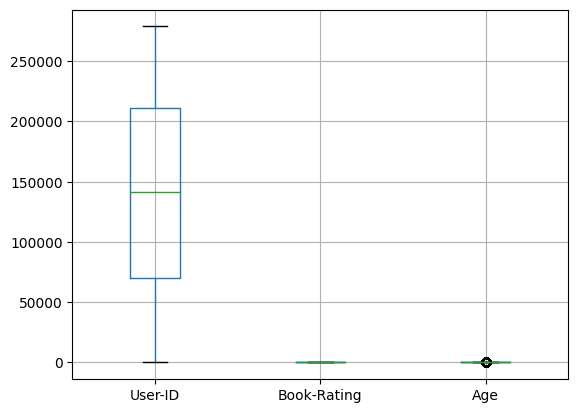

In [72]:
df.boxplot()

In [73]:
df['Age'].max()

244.0

In [74]:
df['Age'].min()

0.0

In [75]:
df[df['Age'] > 85]['Age'].count()

3304

In [76]:
df[df['Age'] < 8]['Age'].count()

2045

In [77]:
#Here Age column is only having outliers, we can handle them using Outlier detection function

#We can set the upper threshold as 85 and lower threshold as 8 for Age
lower_threshold = 8
upper_threshold =85
outliers= df[(df['Age'] < lower_threshold) | (df['Age'] > upper_threshold)]
print(outliers.shape)



(5349, 7)


In [78]:
print(outliers['Age'])

118537     116.0
118538     116.0
118539     116.0
118540     116.0
118541     116.0
           ...  
1030210    104.0
1030252      0.0
1030399     98.0
1030531    103.0
1030648    104.0
Name: Age, Length: 5349, dtype: float64


In [79]:
#Capping outliers
#We can assign the threshold values for all age above 85 and below 8
df['Age'] = df['Age'].apply(lambda x: lower_threshold if x < lower_threshold else (upper_threshold if x > upper_threshold else x))



In [80]:
df.shape

(1030608, 7)

## Data Visualization


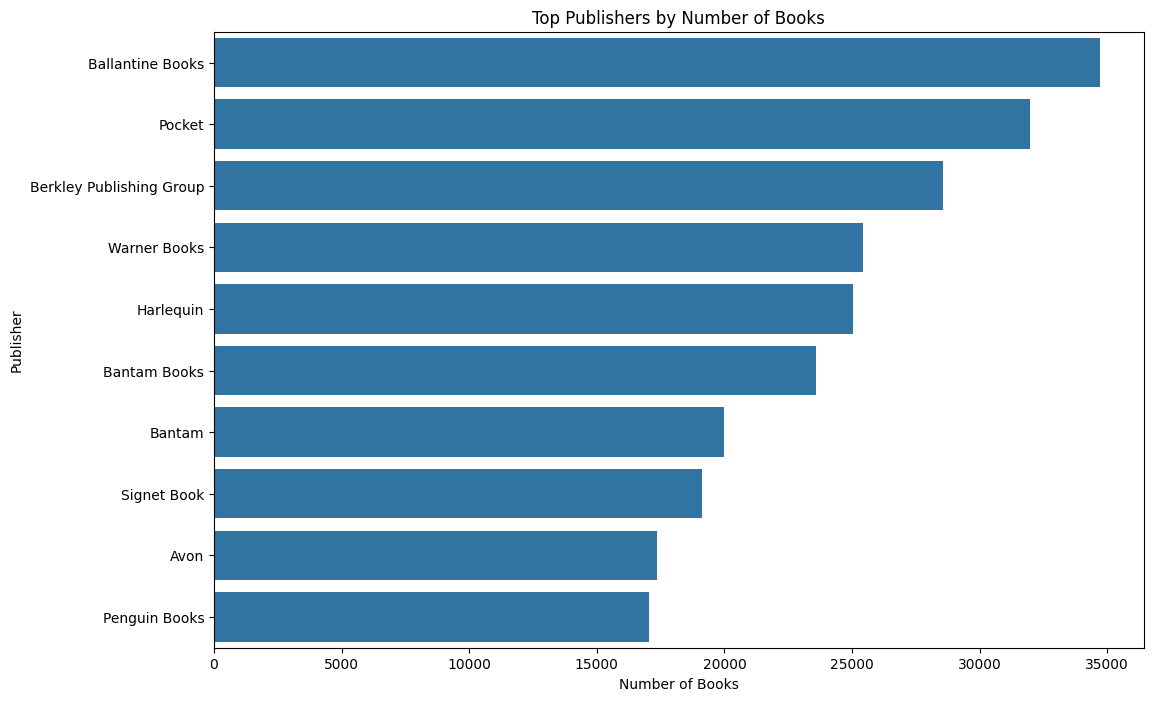

In [81]:
# Bar Plot for Top Publishers
plt.figure(figsize=(12, 8))
top_publishers = df['Publisher'].value_counts().head(10)  # Adjust to show top N publishers
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

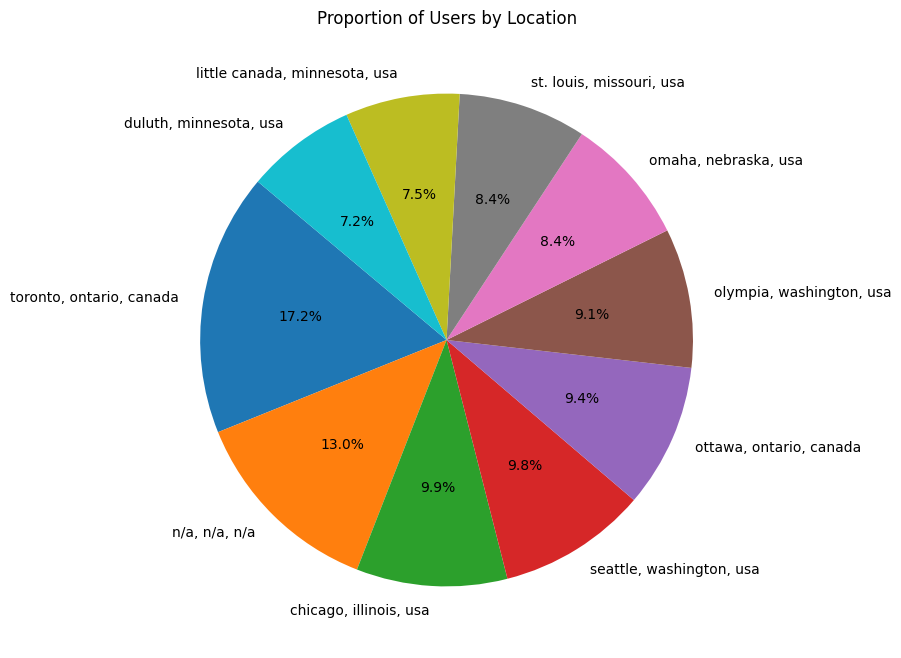

In [82]:
# Pie Chart for Location proportions
plt.figure(figsize=(12, 8))
location_counts = df['Location'].value_counts().head(10)  # Adjust the number to show top N locations
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Users by Location')
plt.show()

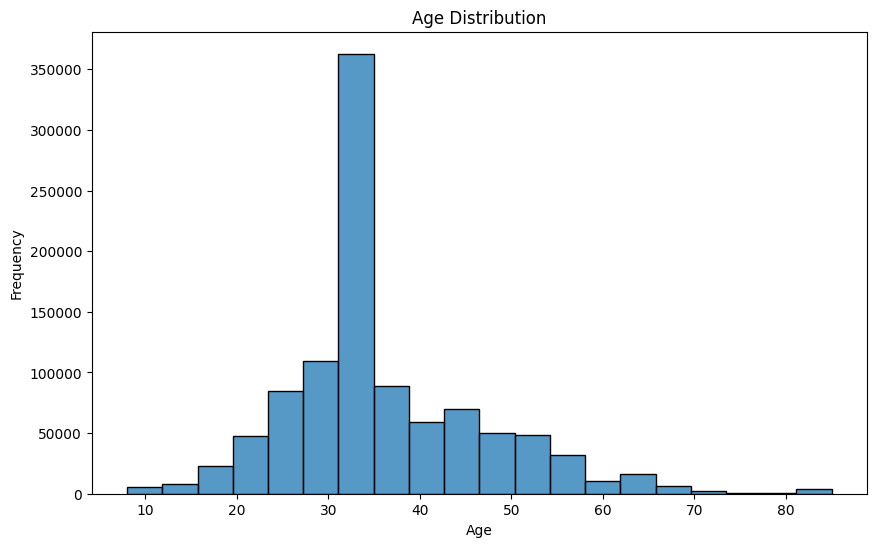

In [83]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

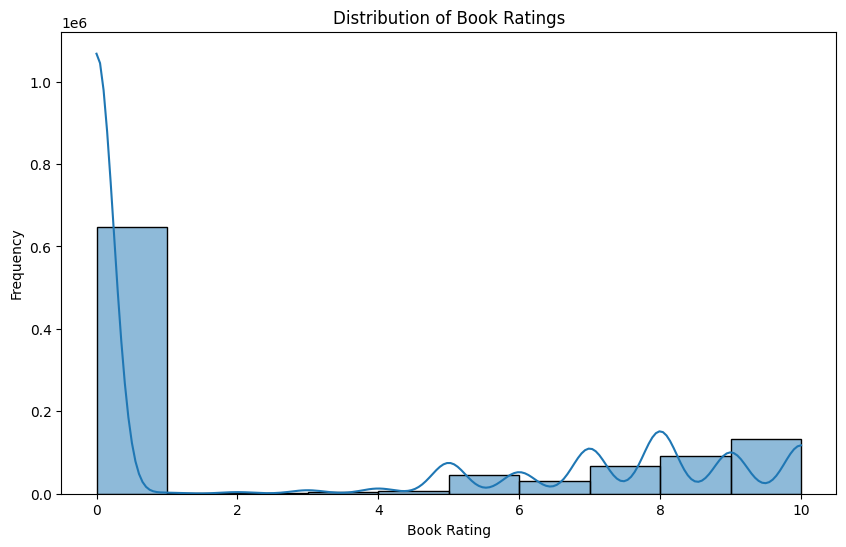

In [84]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

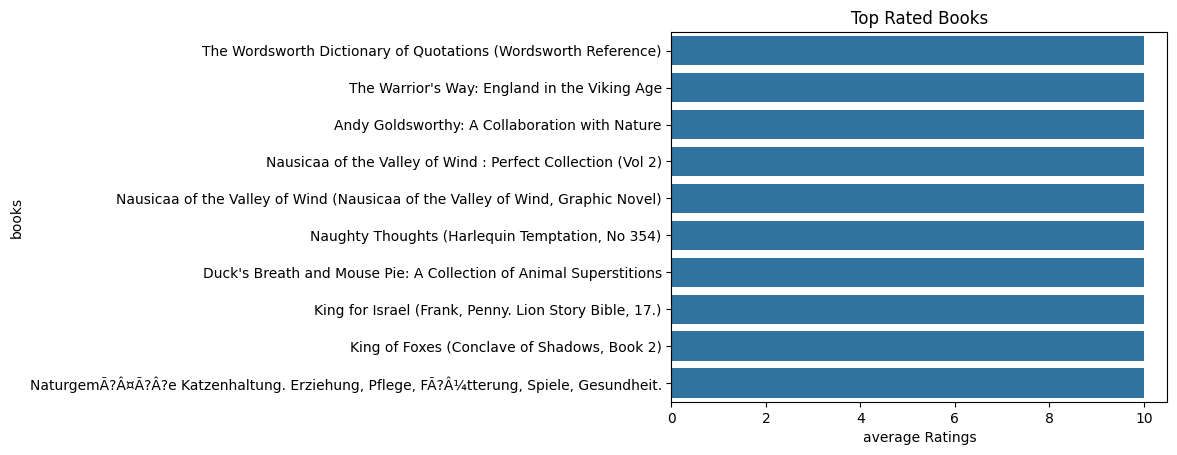

In [85]:
# Top 10 books with high average rating

top_rated_books = df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_rated_books.values, y=top_rated_books.index)
plt.title('Top Rated Books')
plt.xlabel('average Ratings')
plt.ylabel('books')
plt.show()


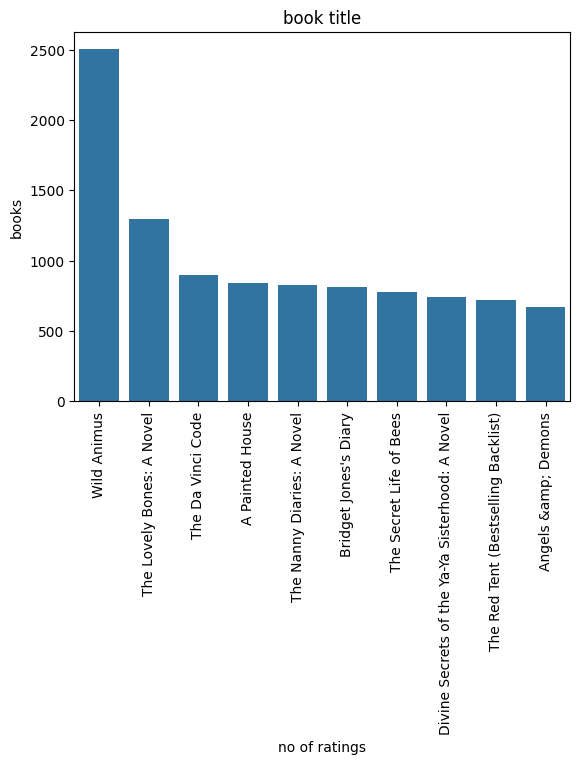

In [86]:
book_rating_counts = df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)
sns.barplot(x=book_rating_counts.index, y=book_rating_counts.values)
plt.title('book title')
plt.xlabel('no of ratings')
plt.xticks(rotation=90)
plt.ylabel('books')
plt.show()